## Automatización:

En esta clase:

- Aprenderemos sobre programar desde una carpeta, o **directorio de trabajo**, y las una rutas o _path_ relativos, o absolutos.
- Veremos como buscar archivos, también listar, borrar, copiar, mover y otras operaciones usuales con el sistema operativo. Librerías os, glob, shutil
- Lectura de distintos tipos de datos: .sav, .dta, .csv, .zip

Actualmente cualquier tarea que uno se proponga automatizar, así lo es. Podemos encontrar un espectro de complejidad:

- Por un lado, con la librería *pyautogui* podemos automatizar movimientos de mouse y teclado. Esto da la posibilidad de automatizar tareas sencillas de una manera directa.

(El siguiente ejemplo anda solo corriendolo como local!)

```python
# Devuelve las dimensiones de la pantalla
ancho, alto = pyautogui.size()
# Devuelve la posición actual
Xactual, Yactual = pyautogui.position()
# Mover a coordenadas (pixels)
pyautogui.moveTo(100, 150) 
# Clickear
pyautogui.click() 
# Tipear con delay
pyautogui.write('Hello world!', interval=0.25)  
# Apretar una tecla
pyautogui.press('esc') 
pyautogui.hotkey('ctrl', 'c')
pyautogui.locateOnScreen()
```

***Nota: Lamentablemente pyautogui es lo único incluido en cualquiera de nuestros cursos que no funciona en Colab! Para ejecutar esta sección instalar Anaconda en la computadora local***

In [4]:
!pip install pyautogui

In [5]:
from time import sleep
import os
import pyautogui as pygui
import numpy as np

In [8]:
# sleep(5)
for i, x in enumerate([np.sin(x) for x in np.linspace(0,50,120)]):
    pygui.moveRel(10,30*x)

In [9]:
def cuadrado(l):
    pygui.drag(l, 0, duration=1)
    pygui.drag(0, l, duration=1)
    pygui.drag(-l, 0, duration=1)
    pygui.drag(0, -l, duration=1)

In [10]:
#sleep(5)
cuadrado(200)

In [4]:
def abrir_paint():
    # Windows
    os.system('start mspaint.exe')
    sleep(1)
    S = pygui.size()
    pygui.moveTo(S[0]//2, S[1]//2)

In [5]:
def cuadrado_espiral(l, ratio=0.9):
    pygui.move(-l//2, -l//2, duration=0.1)
    for i in range(50):
        l = l*ratio
        pygui.drag(l, 0, duration=0.1)
        l = l*ratio
        pygui.drag(0, l, duration=0.1)
        l = l*ratio
        pygui.drag(-l, 0, duration=0.1)
        l = l*ratio
        pygui.drag(0, -l, duration=0.1)
        if l < 5:
            break

In [6]:
import numpy as np

def circulo_espiral(r=100, n=2, t=10):
    S = pygui.size()
    h, k = S[0]//2, S[1]//2
    center = (h, k)

    max_ = n*np.pi*2
    t = np.linspace(0, max_, t)
    x = h + (r-t)*np.cos(t)
    y = k + (r-t)*np.sin(t)

    coords = list(zip(x,y))
    pygui.moveTo(coords[0][0], coords[0][1], duration=0)
    for c in coords:
        x_, y_ = c
        pygui.dragTo(x_, y_, _pause=False, duration=1)

In [7]:
abrir_paint()
sleep(2)
circulo_espiral(n=20, t=10, r=100)

In [14]:
sleep(2)
abrir_paint()
cuadrado_espiral(600)

Ocasionalmente hay algunos casos de uso, pero encontramos obstáculos:

- Frágil ante cambios
- Método bruto, ad hoc
- Solo tareas sencillas

Encontraremos el mismo dilema más adelante en _web scraping_, en un extremo el consumo de APIs y en otro la automatización del navegador.

## Bash y OS

### Interactuando con el Sistema Operativo

In [ ]:
# Con ! enviamos un comando a la terminal del sistema operativo
!pwd

/content


Algunos comandos a saber:

- pwd : "print working directory"
- ls: listar directorio actual
- wget: para descargar archivos 

In [13]:
# http://microdatos.dane.gov.co/index.php/catalog/472/get_microdata
# http://microdatos.dane.gov.co/index.php/catalog/472/download/20101
!wget -O Expo_2021.zip http://microdatos.dane.gov.co/index.php/catalog/472/download/20555
#!unzip -Pintalbid expo.zip -d nueva_carpeta

Librería OS

In [ ]:
import os

```python
#Devuelve el "current working directory", o directorio actual de trabajo
os.getcwd() 

#Es por "change directory", o sea cambiar el directorio actual de trabajo
os.chdir(path)

#recorre recursivamente el árbol de directorios, empezando por el path. 
#en cada iteracion devuelve carpeta, [subcarpetas], [archivos]
os.walk(path)

#crea un directorio
os.makedirs(path)

#chequea si existe un path
os.path.exists(path)

#borra un archivo o carpeta vacia
os.remove(path)

#enumera el contenido del path
os.listdir(path)

#permite cambiar paths, nombres y extensiones
os.rename(path, new_path)

# Devuelve la ruta absoluta de una ruta relativa
os.path.abspath(path)

```

Cuatro maneras de listar la carpeta actual

In [ ]:
# Con la terminal
!ls

expo.zip  nueva_carpeta  sample_data


In [ ]:
!dir

expo.zip  nueva_carpeta  sample_data


In [ ]:
# Con Python
# ruta relativa

os.listdir('.')

['.config', 'expo.zip', 'nueva_carpeta', 'sample_data']

In [ ]:
# Con Python
# ruta absoluta

os.listdir(os.getcwd())

['.config', 'expo.zip', 'nueva_carpeta', 'sample_data']

Tres maneras de ver el directorio actual de trabajo

In [ ]:
os.getcwd()

'/content'

In [ ]:
!pwd

/content


In [ ]:
os.path.abspath('.')

'/content'

Ejercicio:

Cambiar el directorio de trabajo a 'nueva_carpeta' usando os.chdir

In [ ]:
os.chdir('nueva_carpeta')

Buscamos todos los .zip

In [ ]:
for elemento in os.listdir('./Expo_2018/'):  
  if elemento[-4:] == '.zip':
     print(elemento)

Agosto2018.zip
Junio2018.zip
Mayo2018.zip
Noviembre2018.zip
Octubre2018.zip
Enero2018.zip
Julio2018.zip
Septiembre2018.zip
Marzo2018.zip
Febrero2018.zip
Abril2018.zip
Diciembre2018.zip


Ahora usando glob

In [ ]:
from glob import glob

In [ ]:
datos_path = './Expo_2018/' 
zip_files = glob(datos_path + '/*.zip')
zip_files

['./Expo_2018/Agosto2018.zip',
 './Expo_2018/Junio2018.zip',
 './Expo_2018/Mayo2018.zip',
 './Expo_2018/Noviembre2018.zip',
 './Expo_2018/Octubre2018.zip',
 './Expo_2018/Enero2018.zip',
 './Expo_2018/Julio2018.zip',
 './Expo_2018/Septiembre2018.zip',
 './Expo_2018/Marzo2018.zip',
 './Expo_2018/Febrero2018.zip',
 './Expo_2018/Abril2018.zip',
 './Expo_2018/Diciembre2018.zip']

Hacemos un búcle para recorrer los archivos .zip y descomprimirlos en carpetas correspondientes

In [ ]:
import zipfile

# Recorremos la lista de zips

for f in zip_files:

    # Definimos el nombre de la nueva carpeta en una variable
    # Es la misma ruta "f" pero sin el ".zip"

    new_dir = f.replace('.zip', '')
    print(new_dir)

    # Extraemos en la nueva carpeta
    with zipfile.ZipFile(f, "r") as zip_ref:
        zip_ref.extractall(new_dir)      

./Expo_2018/Agosto2018
./Expo_2018/Junio2018
./Expo_2018/Mayo2018
./Expo_2018/Noviembre2018
./Expo_2018/Octubre2018
./Expo_2018/Enero2018
./Expo_2018/Julio2018
./Expo_2018/Septiembre2018
./Expo_2018/Marzo2018
./Expo_2018/Febrero2018
./Expo_2018/Abril2018
./Expo_2018/Diciembre2018


In [ ]:
# Vemos que ya estan los .zips, y carpetas correspondientes
os.listdir('Expo_2018')

['Agosto2018.zip',
 'Abril2018',
 'Junio2018.zip',
 'Febrero2018',
 'Agosto2018',
 'Mayo2018.zip',
 'Noviembre2018.zip',
 'Marzo2018',
 'Octubre2018.zip',
 'Enero2018.zip',
 'Julio2018',
 'Octubre2018',
 'Junio2018',
 'Julio2018.zip',
 'Septiembre2018',
 'Septiembre2018.zip',
 'Marzo2018.zip',
 'Noviembre2018',
 'Enero2018',
 'Febrero2018.zip',
 'Abril2018.zip',
 'Diciembre2018.zip',
 'Mayo2018',
 'Diciembre2018']

```
.
├── Expo_2018
│   ├── Abril2018
│   │   ├── Abril.csv
│   │   ├── Abril.dta
│   │   └── Abril.sav
│   ├── Abril2018.zip

...

│   ├── Octubre2018
│   │   ├── Octubre 2018.csv
│   │   ├── Octubre 2018.dta
│   │   └── Octubre 2018.sav
│   ├── Octubre2018.zip
│   ├── sav_2018
│   ├── Septiembre2018
│   │   ├── Septiembre.csv
│   │   ├── Septiembre.dta
│   │   └── Septiembre.sav
│   └── Septiembre2018.zip

```

In [ ]:
# Buscamos los archivos del tipo que queremos usando glob
# Podemos cambiar el tipo cambiando la siguiente variable

# tipo = 'dta'
# tipo = 'csv'
tipo = 'sav'

datos = glob(f'{datos_path}/*/*{tipo}' )
datos

['./Expo_2018/Abril2018/Abril.sav',
 './Expo_2018/Febrero2018/Febrero.sav',
 './Expo_2018/Agosto2018/Agosto.sav',
 './Expo_2018/Marzo2018/Marzo.sav',
 './Expo_2018/Julio2018/Julio.sav',
 './Expo_2018/Octubre2018/Octubre 2018.sav',
 './Expo_2018/Junio2018/Junio.sav',
 './Expo_2018/Septiembre2018/Septiembre.sav',
 './Expo_2018/Noviembre2018/Noviembre 2018.sav',
 './Expo_2018/Enero2018/Enero.sav',
 './Expo_2018/Mayo2018/Mayo.sav',
 './Expo_2018/Diciembre2018/Diciembre.sav']

In [ ]:
# Chequeamos si la carpeta ya existe, y si no creamos una carpeta para guardar todos archivos los de ese tipo 

if not os.path.exists(datos_path + '/' + tipo + '_2018'):
    os.mkdir(datos_path + tipo + '_2018')

In [ ]:
# Vemos que se creó la carpeta "sav_2018"

!ls Expo_2018

Abril2018	   Enero2018.zip    Marzo2018	       Octubre2018.zip
Abril2018.zip	   Febrero2018	    Marzo2018.zip      sav_2018
Agosto2018	   Febrero2018.zip  Mayo2018	       Septiembre2018
Agosto2018.zip	   Julio2018	    Mayo2018.zip       Septiembre2018.zip
Diciembre2018	   Julio2018.zip    Noviembre2018
Diciembre2018.zip  Junio2018	    Noviembre2018.zip
Enero2018	   Junio2018.zip    Octubre2018


In [ ]:
# Movemos todos los que los archivos de ese tipo a la nueva carpeta
# Podemos chequear si ya está en la carpeta con os.path.exists 

for d in datos:
    # Definimos en una variable cuál va a ser la nueva ruta
    new_path = datos_path + tipo + '_2018/' + d.split('/')[-1]
    if not os.path.exists(new_path):
        os.rename(d, new_path)

In [ ]:
# Listamos los archivos dentro de la nueva carpeta

!ls {datos_path}/{tipo}_2018

 Abril.sav	 Enero.sav     Junio.sav  'Noviembre 2018.sav'
 Agosto.sav	 Febrero.sav   Marzo.sav  'Octubre 2018.sav'
 Diciembre.sav	 Julio.sav     Mayo.sav    Septiembre.sav


```
.
├── Expo_2018
│   ├── Abril2018
│   │   ├── Abril.csv
│   │   └── Abril.dta
│   ├── Abril2018.zip
│   ├── Agosto2018
│   │   ├── Agosto.csv

...

│   ├── Octubre2018
│   │   ├── Octubre 2018.csv
│   │   └── Octubre 2018.dta
│   ├── Octubre2018.zip
│   ├── sav_2018
│   │   ├── Abril.sav
│   │   ├── Agosto.sav
│   │   ├── Diciembre.sav
│   │   ├── Enero.sav
│   │   ├── Febrero.sav
│   │   ├── Julio.sav
│   │   ├── Junio.sav
│   │   ├── Marzo.sav
│   │   ├── Mayo.sav
│   │   ├── Noviembre 2018.sav
│   │   ├── Octubre 2018.sav
│   │   └── Septiembre.sav
│   ├── Septiembre2018
│   │   ├── Septiembre.csv
│   │   └── Septiembre.dta
│   └── Septiembre2018.zip
```

En dos casos puede ser necesario recurrir a otra librería, _shutil_

Estos casos son:

- copyfile: para copiar archivos
- rmtree: para borrar directorios

Usaremos esta 2da función para limpiar los archivos que extrajimos y no necesitamos

```python
from shutil import copyfile
copyfile(src, dst)
```

In [ ]:
import shutil

for f in zip_files:
    
    # ¡CUIDADO!
    # Estas funciones de borrar y renombrar son potencialmente peligrosas
    # Antes de ejecutarlas con una ruta, pueden hacer un print para asegurarse de qué se haría
    
    # Borramos las carpetas de más, para eso
    # buscamos la ruta absoluta del zip. 
    # Sabemos que carpeta donde se extrajo se llama igual pero sin .zip
    zip_dir = os.path.abspath(f).split('.')[0]
    
    print('Borrando...', zip_dir)

    shutil.rmtree(zip_dir)

    # Borramos también los .zip
    os.remove(f)

/content/nueva_carpeta/Expo_2018/Agosto2018
/content/nueva_carpeta/Expo_2018/Junio2018
/content/nueva_carpeta/Expo_2018/Mayo2018
/content/nueva_carpeta/Expo_2018/Noviembre2018
/content/nueva_carpeta/Expo_2018/Octubre2018
/content/nueva_carpeta/Expo_2018/Enero2018
/content/nueva_carpeta/Expo_2018/Julio2018
/content/nueva_carpeta/Expo_2018/Septiembre2018
/content/nueva_carpeta/Expo_2018/Marzo2018
/content/nueva_carpeta/Expo_2018/Febrero2018
/content/nueva_carpeta/Expo_2018/Abril2018
/content/nueva_carpeta/Expo_2018/Diciembre2018


In [ ]:
# Nos queda solo la carpeta con todos los archivos del tipo elegido, ordenados

!ls {datos_path}

sav_2018


Cargamos los datos a un DataFrame

In [ ]:
from glob import glob

rutas_datos = glob(datos_path + '/*/*' + tipo)
rutas_datos

['./Expo_2018/sav_2018/Septiembre.sav',
 './Expo_2018/sav_2018/Diciembre.sav',
 './Expo_2018/sav_2018/Febrero.sav',
 './Expo_2018/sav_2018/Octubre 2018.sav',
 './Expo_2018/sav_2018/Noviembre 2018.sav',
 './Expo_2018/sav_2018/Enero.sav',
 './Expo_2018/sav_2018/Mayo.sav',
 './Expo_2018/sav_2018/Agosto.sav',
 './Expo_2018/sav_2018/Julio.sav',
 './Expo_2018/sav_2018/Marzo.sav',
 './Expo_2018/sav_2018/Junio.sav',
 './Expo_2018/sav_2018/Abril.sav']

Leemos 3 tipos de datos:
- Stata
- SPSS
- csv

In [ ]:
import pandas as pd

datos = []

for r in rutas_datos:

    if tipo == 'dta':
        # En el caso de stata necesitamos instalar la siguiente librería
        !pip install pyreadstat
        import pyreadstat

        df, metadata = pyreadstat.read_dta(r)    

    elif tipo == 'sav':
        df = pd.read_spss(r)

    elif tipo == 'csv':
        df = pd.read_csv(r, delimiter = ';')

    else:
        print('Otro tipo!')

datos.append(df)

dataframe_total = pd.concat(datos)
dataframe_total.to_csv('todos.csv')

In [ ]:
dataframe_total.sample(3)

,FECH,ADUA,PAIS,COD_PAI4,COD_SAL1,COD_SAL,DPTO2,VIA,BANDERA,REGIM,MODAD,FINALID,CER_ORI1,SISESP,POSAR,DPTO1,UNID,CODUNI2,CANTI,PBK,PNK,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG,NIT,RAZ_SIAL
34570,1812.0,Cali,317,GTM,3.0,BOGOTA,VALLE DEL CAUCA,4.0,580.0,1.0,198.0,1.0,8.0,1.0,6.204630e+09,76.0,11.0,U,70.00,32.59,29.64,1742.00,5550768.36,1070.31,0.0,0.0,0.0,805003626,STF GROUP S.A.
30471,1808.0,Cartagena,580,PAN,6.0,CARTAGENA,BOGOTA,1.0,580.0,1.0,198.0,1.0,8.0,2.0,3.305900e+09,11.0,33.0,KG,849.94,965.99,849.94,11471.51,33660966.50,0.00,0.0,0.0,0.0,79421317,BUITRAGO BUITRAGO CARLOS
6953,1808.0,Especial de Aduanas de Bogotá,309,GLP,3.0,BOGOTA,ANTIOQUIA,4.0,249.0,1.0,198.0,1.0,6.0,1.0,6.031500e+08,5.0,11.0,U,2790.00,290.23,280.00,1980.65,5980671.70,1980.65,0.0,0.0,0.0,800160435,FLORES DE LA CAMPIÑA S.A.S.


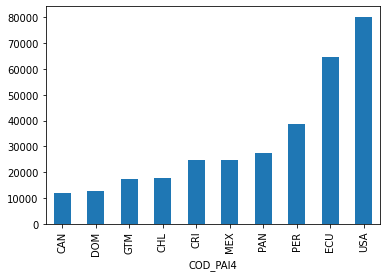

In [ ]:
dataframe_total.groupby('COD_PAI4')\
  .count()['CANTI']   \
  .sort_values()      \
  .iloc[-10:]         \
  .plot.bar();

# Más práctica

Ejercicio:

1) Tomar la lista de temas del Google Sheets

2) Crear una carpeta con su nombre en "title case"

3) Dentro de cada carpeta, guardar los datos de tendencias para el día de 

Para acceder al Google Sheets necesitan primero subir el archivo "alumnos.json" ejecutando la siguiente celda:

In [ ]:
from google.colab import files
files.upload()

Luego de ejecutar la siguiente celda, clickear "restart runtime" para que se actualice la librería gspread


In [ ]:
import gspread
# Local
!pip install gspread --upgrade
gc = gspread.service_account(filename='./alumnos.json')

Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [ ]:
# Abrimos el g-sheet y descargamos los datos como una lista de diccionarios

sh = gc.open("BID/INTAL")
data = sh.sheet1.get_all_records()

In [ ]:
data[0]

{'Enviado': '',
 'Mail': 'barafani.magdalena@gmail.com',
 'Nombre': 'Magdalena Barafani',
 'Tema': 'estadísticas laborales'}

La siguiente celda prepara y define una función _get_trends_ para buscar tendencias de Google. La misma recibe una búsqueda y devuelve un diccionario con los datos de las tendencias.

In [ ]:
!pip install pytrends

import pandas as pd                        
from pytrends.request import TrendReq

def get_trends(query):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=[query])
    df = pytrend.interest_by_region()
    return df.sort_values(query, ascending=False)[query].to_dict()

Ahora sí:

- Recorrer la lista de diccionarios
- Tomar el tema de cada persona
- Buscar las tendencias con la función get_trends
- Si no existe ya la carpeta para ese tema, crearla
- Crear un archivo .txt o .csv con los datos buscados dentro de esa carpeta

In [ ]:
data[0]

In [ ]:
# Ejemplo
query = 'Python'
tendencias = get_trends(query)
tendencias

In [ ]:
for d in data:
    if not os.path.exists(d['Tema']):
        os.makedirs(d['Tema'])

    tendencias = get_trends(d['Tema'])

    with open(d['Tema']+ '/' + f"{d['Tema']}.txt", 'w') as out:
        out.write(str(tendencias))

In [ ]:
os.listdir('.')

['.config',
 'alumnos.json',
 'desigualdad',
 'demografía',
 'prosur',
 'ied',
 'sistemas',
 'integración',
 'redes neuronales',
 'feedlot',
 'covid',
 'inflación',
 'género',
 'sustentabilidad',
 'postres',
 'estadísticas laboralesestadísticas laborales.txt',
 'Python',
 'eph',
 'estadísticas laborales',
 'sample_data']